In [205]:
#coding: utf-8
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sys
import codecs
%matplotlib inline 
import matplotlib.font_manager
from enum import Enum
from matplotlib import cm

class State(Enum):
    NEUTRAL = 1
    ITEM_NAME = 2
    DATA = 3
    AXIS_LABEL = 4
    TITLE = 5
    X_DATA = 6            

In [206]:

#%property:title

#%x_data
#%y_data:[系列の名前]
def make_line_plot(input_filename, output_filename,figure_size=(4.5, 4.5),dpi = 100, legend_flag = True, legend_loc = 2,bbox_to_anchor=False, line_width = 3, color_list = [], marker = None, markersize = 10, value_label = False):    

    f_in  = codecs.open(input_filename, 'r', 'utf-8')

    lines = f_in.readlines() #読み込み
    lines2 = []

    name_list = []
    item_name_list = []
    data_list = []
    x_data = []
    x_list = []
    index_of_data_list = -1
    index_of_element = 1
    state = State.NEUTRAL

    axis_list = []
    title = None
    for line in lines:
        if line[0] == "#" or line[0] == "\n":
            continue
        elif u"%property:title" in line:
            state = State.TITLE
            continue        
        if u"%y_data:" in line:
            name_list.append(line[8:-1])
            data_list.append([])
            index_of_data_list += 1
            index_of_element = 1
            x_list.append([])
            state = State.DATA
            continue
        if  u"%x_data" in line:
            state = State.X_DATA
            continue            
        elif u"%property:axis_label" in line:
            state = State.AXIS_LABEL
            continue

        if state == State.ITEM_NAME:
            item_name_list.append(line.strip())
        elif state == State.DATA: 
            data_list[index_of_data_list].append(float(line))
            index_of_element += 1
        elif state == State.AXIS_LABEL:
            axis_list.append(line.strip())
        elif state == State.TITLE:
            title = line.strip()
        elif state == State.X_DATA:
            x_data.append(float(line))
    plt.figure(figsize=figure_size, dpi=dpi)
    if title is not None:
        plt.title(title, fontsize=20)
    for index, (name, y) in enumerate(zip(name_list, data_list)):
        if len(color_list) == 0:
            c = cm.prism(float(index) / len(name_list))
        else:
            c = color_list[index]
        
        plt.plot(x_data, y, label=str(name),  color = c, lw = line_width, marker = marker[len(marker) - 1 if index > len(marker) - 1 else index], markersize=markersize)
        if value_label:
            for i, j in zip(x_data, y):
                plt.text(i+100, j , str(round(j,1)), ha='center', va='bottom', fontsize=13, bbox={'facecolor':'white', 'alpha':1, 'pad':2,"lw":0.5})
    if legend_flag == True:
        if bbox_to_anchor == False:
            plt.legend(loc=legend_loc)
        else:
            plt.legend(loc=legend_loc, bbox_to_anchor=bbox_to_anchor)
            
    #軸ラベル
    plt.xlabel(axis_list[0], fontsize=20) # x軸のタイトル
    plt.ylabel(axis_list[1], fontsize=20) # y軸
    #目盛り文字サイズ
    plt.tick_params(labelsize=16)
#     plt.show()
    plt.savefig( output_filename, bbox_inches="tight", pad_inches=0.2)

In [199]:

#%property:title
#%property:axis_label
#%property:item_names
#%series_name:[系列の名前]
def make_bar_plot(input_filename, output_filename,width_of_bar = 0.3, bar_offset = 0.3 / 2,figure_size=(5.5, 4.5),dpi = 100, xmargin = 0.5, ymargin = 0.1, color_list = [], value_label = False):

    f_in  = codecs.open(input_filename, 'r', 'utf-8')

    lines = f_in.readlines() #読み込み
    lines2 = []

    name_list = []
    item_name_list = []
    data_list = []
    x_list = []
    index_of_data_list = -1
    index_of_element = 1
    state = State.NEUTRAL

    axis_list = []
    title = None
    for line in lines:
        if line[0] == "#" or line[0] == "\n":
            continue
        elif u"%property:title" in line:
            state = State.TITLE
            continue        
        if u"%series_name:" in line:
            name_list.append(line[13:-1])
            data_list.append([])
            index_of_data_list += 1
            index_of_element = 1
            x_list.append([])
            state = State.DATA
            continue
        elif u"%property:item_names" in line:
            state = State.ITEM_NAME
            continue
        elif u"%property:axis_label" in line:
            state = State.AXIS_LABEL
            continue

        if state == State.ITEM_NAME:
            item_name_list.append(line.strip())
        elif state == State.DATA: 
            data_list[index_of_data_list].append(float(line))
            x_list[index_of_data_list].append(index_of_element + (width_of_bar * (index_of_data_list )))
            index_of_element += 1
        elif state == State.AXIS_LABEL:
            axis_list.append(line.strip())
        elif state == State.TITLE:
            title = line.strip()
            
    plt.figure(figsize=figure_size, dpi=dpi)
    if title is not None:
        plt.title(title, fontsize=20)
#     print(data_list,name_list, x_list,item_name_list)
    for index, (name, x, y) in enumerate(zip(name_list, x_list, data_list)):
        if len(color_list) == 0:
            c = cm.gist_rainbow(float(index) / len(name_list))
        else:
            c = color_list[index]
        plt.bar(x, y, color=c, width= width_of_bar, label=str(name), align="center")
        if value_label:
            for i, j in zip(x, y):
                plt.text(i, j, str(round(j,1)), ha='center', va='bottom', fontsize=13)
#     plt.legend(loc=2)
    #軸ラベル
#     print(axis_list)
    plt.xlabel(axis_list[0], fontsize=20) # x軸のタイトル
    plt.ylabel(axis_list[1], fontsize=20) # y軸
    #目盛り文字サイズ
    plt.tick_params(labelsize=16)
    # X軸の目盛りを置換
#     print(x_list)
    #xticks_coordinate = [x - width_of_bar/2 for x in x_list[0]]
    xticks_coordinate = [x - bar_offset  for x in x_list[0]]
    plt.xticks(xticks_coordinate, item_name_list)
    plt.xlim([xticks_coordinate[0] - xmargin,xticks_coordinate[-1] + xmargin])
    plt.ylim([0, np.amax(np.array(data_list)) * (1 + ymargin)])
#     plt.show()
    plt.savefig( output_filename, bbox_inches="tight", pad_inches=0.2,  transparent=True)

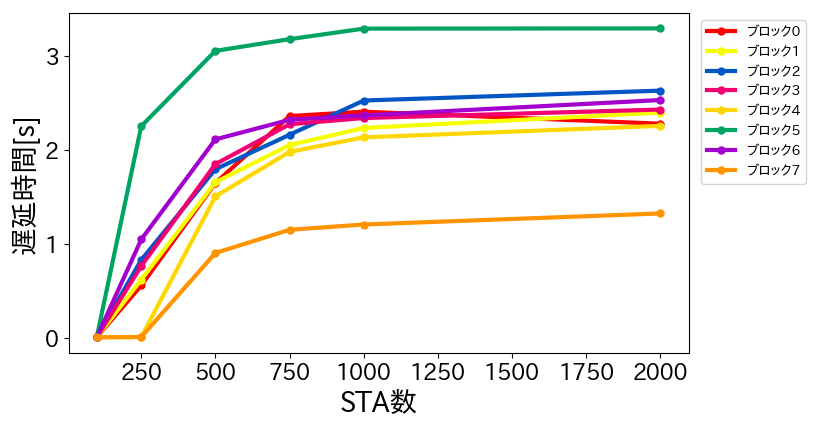

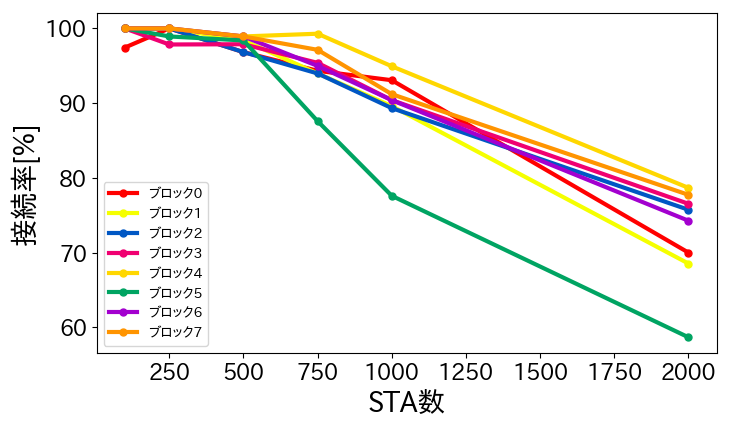

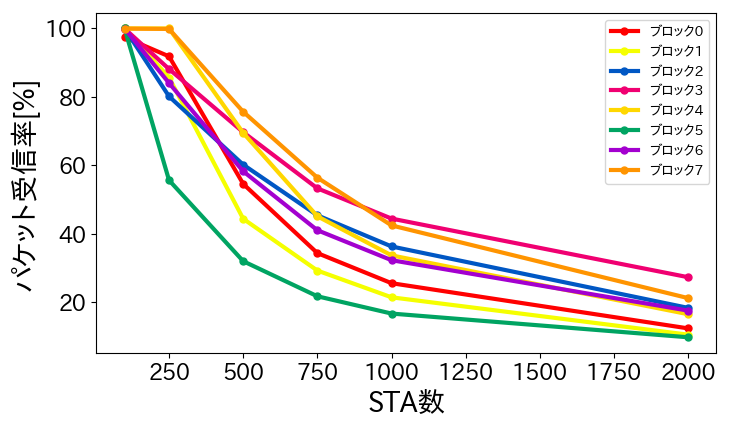

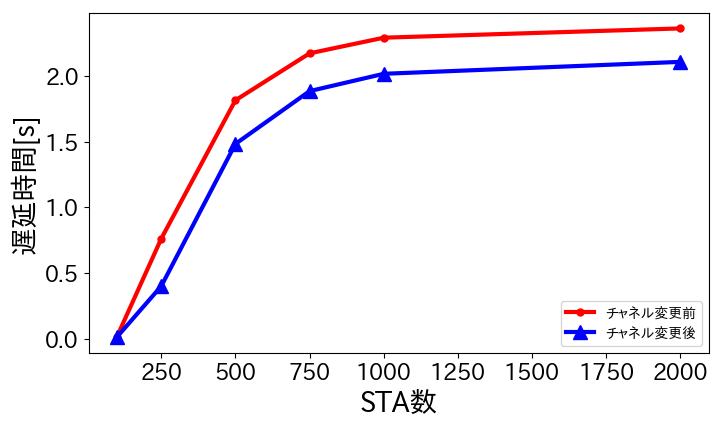

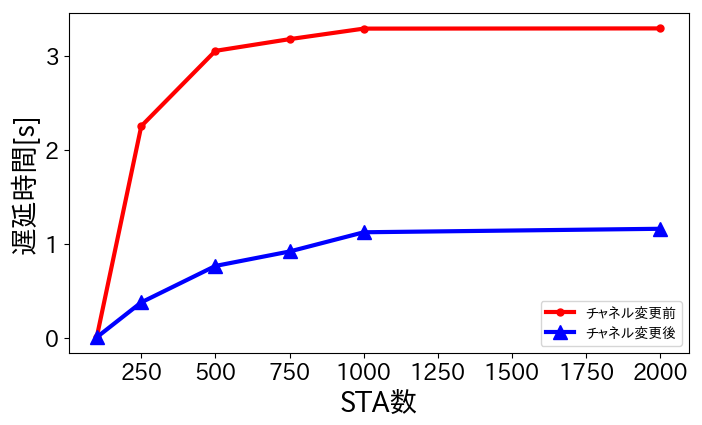

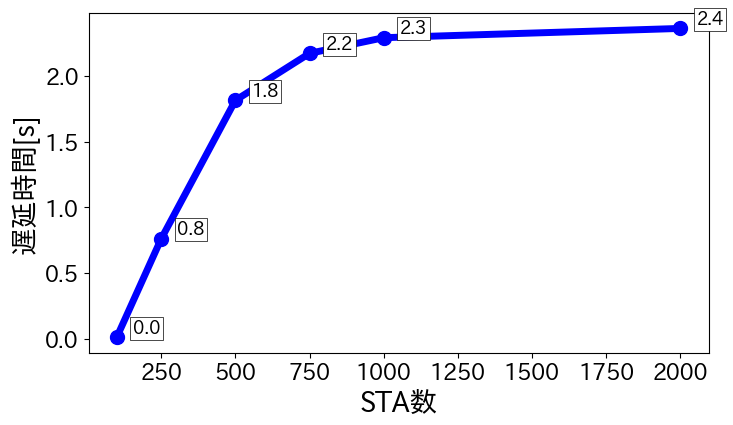

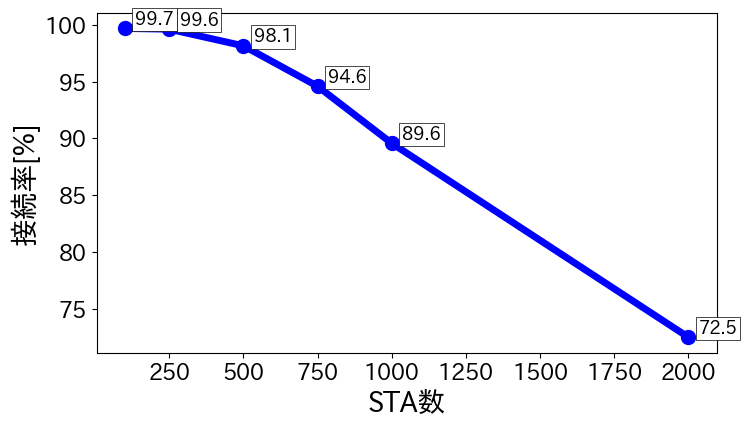

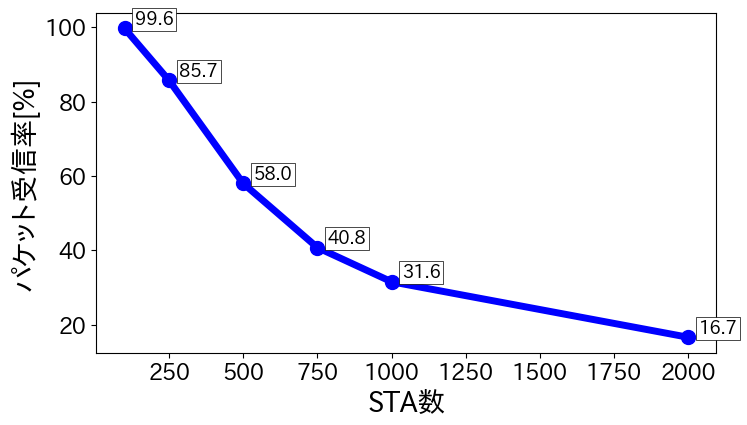

In [203]:
#make_bar_plot("input/speed_stop.txt", "output/bar_plot.eps", xmargin = 0.6, ymargin=0.2)
#make_line_plot("input/stop_grid_front_10-20.txt", "output/line_plot.eps")
# make_bar_plot("input/fig5.txt", "output/fig5.eps", xmargin = 0.6, ymargin=0.2, width_of_bar = 0.6, figure_size=(8, 4.5) ,bar_offset = 0, color_list = ["b"])
# make_bar_plot("input/fig7.txt", "output/fig7.eps", xmargin = 0.6, ymargin=0.2, width_of_bar = 0.6, figure_size=(8, 4.5) ,bar_offset = 0, color_list = ["b"])
# make_bar_plot("input/fig9.txt", "output/fig9.eps", xmargin = 0.6, ymargin=0.2, width_of_bar = 0.6, figure_size=(8, 4.5) ,bar_offset = 0, color_list = ["b"])
make_line_plot("input/fig6.txt", "output/fig6.eps", figure_size=(8, 4.5), legend_loc = "upper right",bbox_to_anchor=(1.2,1) ,marker = ["."], markersize = 10)
make_line_plot("input/fig8.txt", "output/fig8.eps", figure_size=(8, 4.5), legend_loc = 3, marker = ["."], markersize = 10)
make_line_plot("input/fig10.txt", "output/fig10.eps", figure_size=(8, 4.5), legend_loc = 1, marker = ["."], markersize = 10)

make_line_plot("input/fig13.txt", "output/fig13.eps", figure_size=(8, 4.5),color_list = ["r","b"], legend_loc = 4, marker = [".", "^"], markersize = 10)
make_line_plot("input/fig14.txt", "output/fig14.eps", figure_size=(8, 4.5),color_list = ["r","b"], legend_loc = 4, marker = [".", "^"], markersize = 10)
make_line_plot("input/fig5.txt", "output/fig5.eps", figure_size=(8, 4.5), legend_flag=False, line_width=5,color_list = ["b"], marker = ["."], markersize = 20, value_label=True)
make_line_plot("input/fig7.txt", "output/fig7.eps", figure_size=(8, 4.5), legend_flag=False, line_width=5,color_list = ["b"], marker = ".", markersize = 20, value_label=True)
make_line_plot("input/fig9.txt", "output/fig9.eps", figure_size=(8, 4.5), legend_flag=False, line_width=5,color_list = ["b"], marker = ".", markersize = 20, value_label=True)